# Import

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import librosa as lr

# STFT

In diesem Notebook werden wir die STFT selbst implementieren.

Dafür verwenden wir die in der letzten Sitzung selbst implementierte DFT-Funktion `calc_dft`:

In [4]:
def calc_dft(x):

    N = np.shape(x)[0]
    n = np.linspace(0, N, N) # arange

    dft = np.array([])

    for k in range(N):
        e = np.exp(2 * np.pi * -1j * k * n / N)
        dft_k = np.sum(x * e)
        dft = np.append(dft, dft_k)
    
    return dft

<p><div style="background-color:lightyellow;border-style:groove">
    
**Aufgabe:**

Implementiert die Funktion `calc_stft`

*Tipps:*

- Erinnert euch an Session 05: Envelopes | Windowing.
- Die Ergebnisse der STFT sollen in einer Matrix (= multidimensionaler Array) gespeichert werden (siehe nächster Code-Block) –> Es bietet sich also an, einen leeren Array `stft` zu erstellen, in den man dann im Loop jeweils die Ergebnisse schreibt.
    - `stft` muss also so viele Zeilen haben, wie das Fenster lang ist (`window_length`) und so viele Spalten haben, wie viele Fenster wir insgesamt berechnen werden (`num_wins`)
    - Da das Ergebnis der DFT komplexe Zahlen liefert, müsst ihr mit dem `dtype`-keyword beim Erstellen des (numpy-)Arrays `complex` angeben.
    - Innerhalb des Loops soll pro Fenster jeweils die DFT berechnet werden (verwendet hierfür `calc_dft` oder `np.fft.fft` - wie ihr mögt). Diese DFT soll dann in die jeweilige Spalte der `stft`-Matrix geschrieben werden -> erinnert euch daran, wie wir mit `a[start_y:stop_y, start_x:stop_y]` einen bestimmten Ausschnitt einer gegebenen Matrix (hier `a`) referenzieren können.

</div></p>

In [5]:
# f --> frequenz index
# t --> zeit index

np.array([['f0 t0', 'f0 t1', 'f0 t2', 'f0 t3', 'f0 t4', '...'], # fourier_coef 0
          ['f1 t0', 'f1 t1', 'f1 t2', 'f1 t3', 'f1 t4', '...'], # fourier_coef 1
          ['f2 t0', 'f2 t1', 'f2 t2', 'f2 t3', 'f2 t4', '...'], # fourier_coef 2
          ['f3 t0', 'f3 t1', 'f3 t2', 'f3 t3', 'f3 t4', '...'], # fourier_coef 3
          ['f4 t0', 'f4 t1', 'f4 t2', 'f4 t3', 'f4 t4', '...'], # fourier_coef 4
          ['...',   '...',   '...',   '...',   '...',   '...']])  # ...
#           win 0    win1     win2     win3     win4     ...

array([['f0 t0', 'f0 t1', 'f0 t2', 'f0 t3', 'f0 t4', '...'],
       ['f1 t0', 'f1 t1', 'f1 t2', 'f1 t3', 'f1 t4', '...'],
       ['f2 t0', 'f2 t1', 'f2 t2', 'f2 t3', 'f2 t4', '...'],
       ['f3 t0', 'f3 t1', 'f3 t2', 'f3 t3', 'f3 t4', '...'],
       ['f4 t0', 'f4 t1', 'f4 t2', 'f4 t3', 'f4 t4', '...'],
       ['...', '...', '...', '...', '...', '...']], dtype='<U5')

In [6]:
def calc_stft(x, hop_length=200, window_length=500):

    length = np.shape(x)[0]
    num_wins = (length - window_length) // hop_length

    stft = np.zeros((window_length, num_wins), dtype=complex)

    for i in range(num_wins):

        start_i = i * hop_length
        stop_i = start_i + window_length
        window = x[start_i : stop_i]

        stft[:, i] = calc_dft(window)
    
    return stft

Nun können wir die STFT berechnen und plotten:

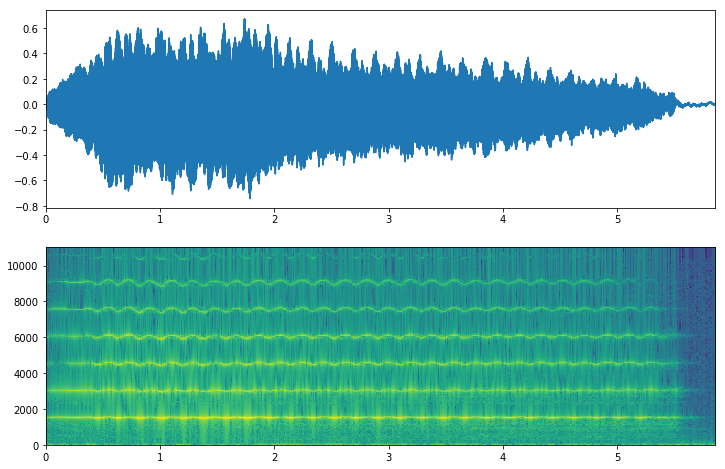

In [11]:
x, sr = lr.load('../data/violin.mp3')

stft = calc_stft(x)

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
length = np.shape(x)[0]
t = np.linspace(0, length / sr, length)
plt.plot(t, x)
plt.xlim(0, length / sr)

plt.subplot(2, 1, 2)
# to dB
plt.imshow(10 * np.log10(np.abs(stft)), aspect='auto', origin='lower', extent=[0, np.shape(x)[0] / sr, 0, sr])
plt.ylim(0, sr / 2)
plt.show()

Überlegung für nächste Woche: Was passiert, wenn wir verschiedene window-sizes und hop_lengths verwenden?

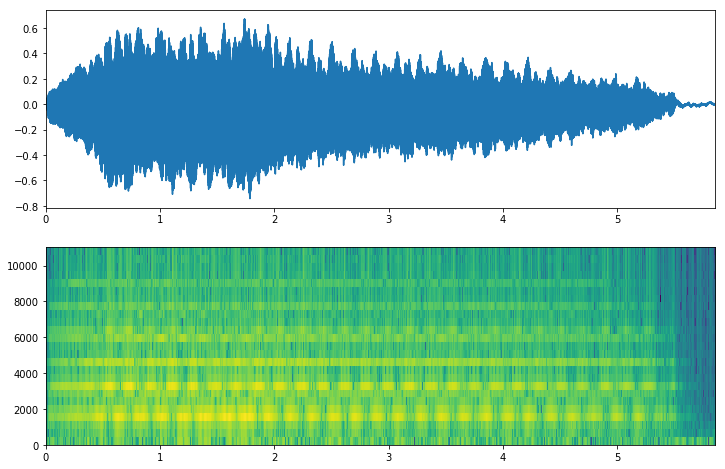

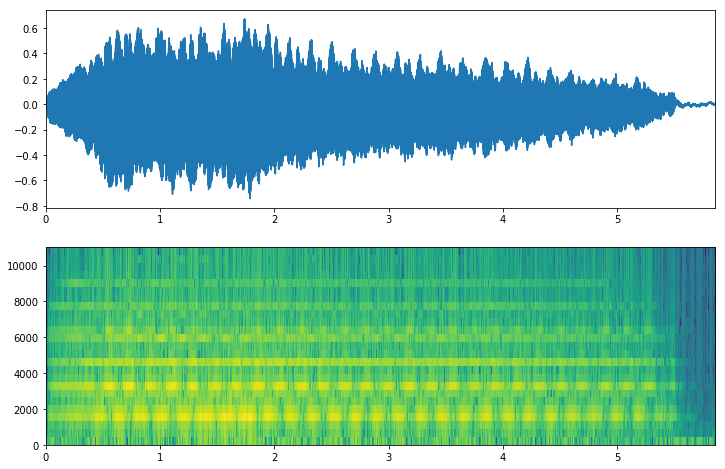

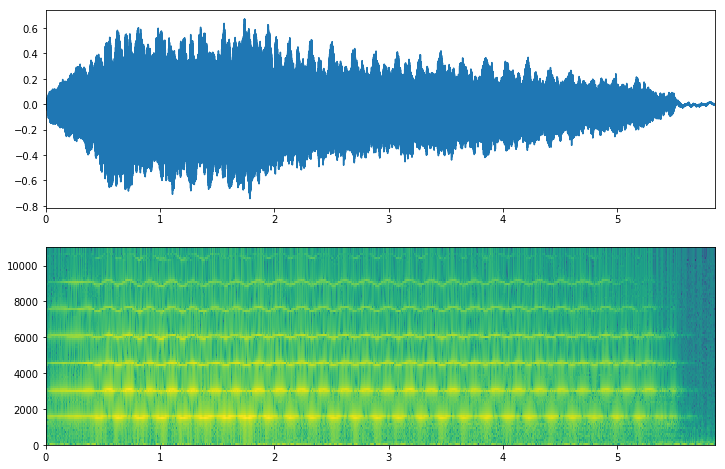

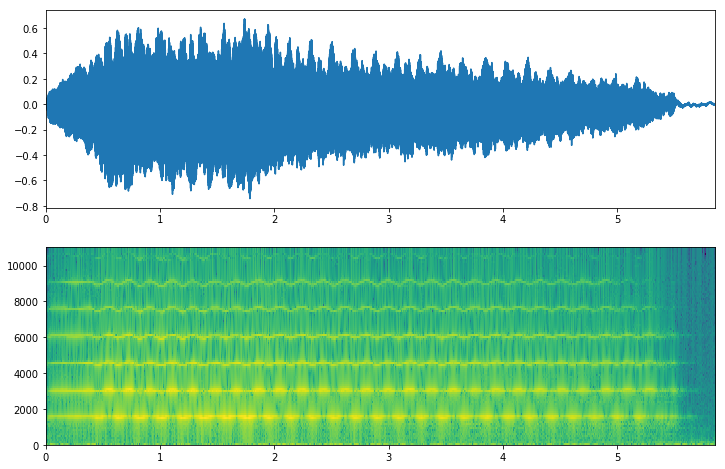

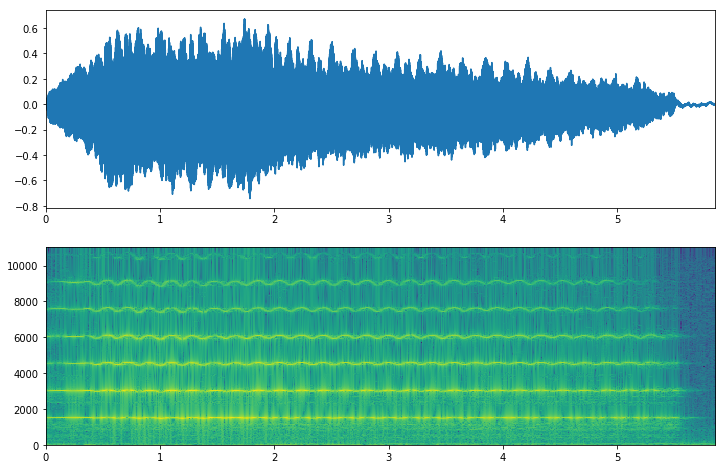

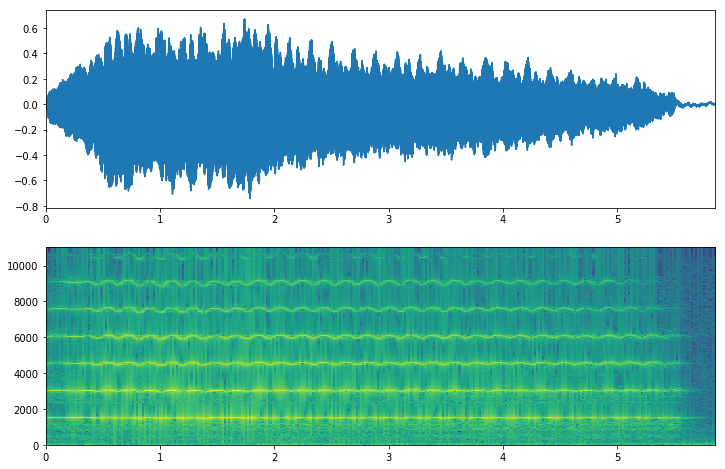

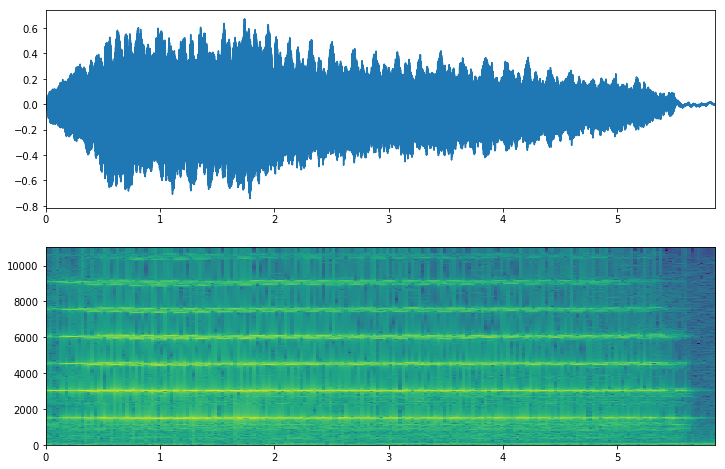

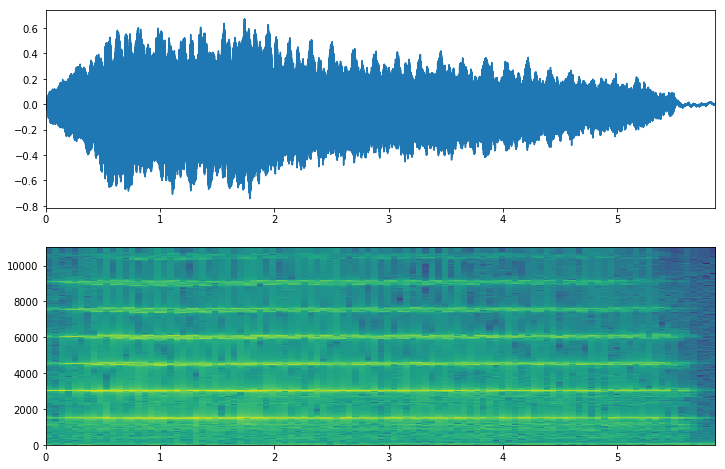

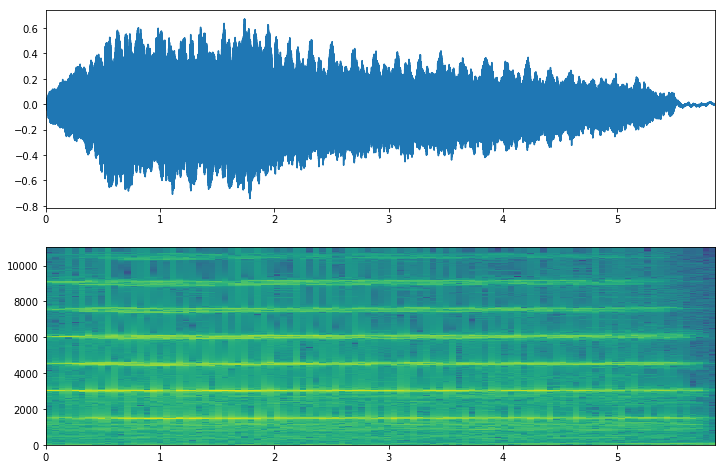

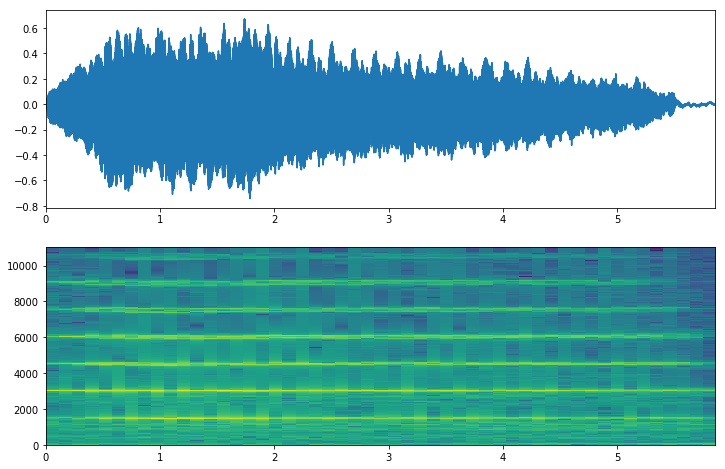

In [13]:
# ausführen dieses code-blocks kann ein bisschen dauern

window_sizes = [50, 200, 800, 2400, 4800]
for window_size in window_sizes:

    hop_lengths = [window_size / 4, window_size / 2]
    for hop_length in hop_lengths:

        stft = calc_stft(x, hop_length=int(hop_length), window_length=int(window_size))

        plt.figure(figsize=(12, 8))

        plt.subplot(2, 1, 1)
        length = np.shape(x)[0]
        t = np.linspace(0, length / sr, length)
        plt.plot(t, x)
        plt.xlim(0, length / sr)
        
        plt.subplot(2, 1, 2)
        # to dB
        plt.imshow(10 * np.log10(np.abs(stft)), aspect='auto', origin='lower', extent=[0, np.shape(x)[0] / sr, 0, sr])
        plt.ylim(0, sr / 2)
        plt.show()